# Machine Learning Notebooks

*Welcome to the Machine Learning Notebooks!*

[Prerequisites](#Prerequisites) (see below)

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://homl.info/kaggle/"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [2]:
!pip install bs4

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 KB 7.5 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=56c48eab6183485ecceb50d73dcf8f59d8aa455fb514deb657964b13118ae09a
  Stored in directory: /home/jovyan/.cache/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [3]:
import os
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen, Request
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
url = 'https://finviz.com/quote.ashx?t=AMZN'

In [5]:
web_url = 'https://finviz.com/quote.ashx?t='

news_tables = {}
tickers = ['AMZN', 'GOOG', 'TSLA']

for tick in tickers:
    url = web_url + tick
    req = Request(url=url,headers={"User-Agent": "Chrome"}) 
    response = urlopen(req)    
    html = BeautifulSoup(response,"html.parser")
    news_table = html.find(id='news-table')
    news_tables[tick] = news_table

In [6]:
amazon = news_tables['AMZN']
amazon_tr = amazon.findAll('tr')

for x, table_row in enumerate(amazon_tr):
    a_text = table_row.a.text
    td_text = table_row.td.text
    print(a_text)
    print(td_text)
    if x == 3:
        break

Here Are the Tech Stocks to Buy After a Crazy Week of Earnings
Feb-04-22 07:05PM  
Peloton Draws Interest From Amazon, Other Suitors: WSJ
06:30PM  
Amazons market value just soared a record $191 billion a day after Facebook parent Meta suffered an unprecedented drop
06:28PM  
Jeff Bezos paid for his megayacht to pass under a bridge in Europe while over a third of Americas are falling apart
06:17PM  


In [7]:
news_list = []

for file_name, news_table in news_tables.items():
    for i in news_table.findAll('tr'):
        
        text = i.a.get_text() 
        
        date_scrape = i.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        tick = file_name.split('_')[0]
        
        news_list.append([tick, date, time, text])

In [10]:
vader = SentimentIntensityAnalyzer()

columns = ['ticker', 'date', 'time', 'headline']

news_df = pd.DataFrame(news_list, columns=columns)

scores = news_df['headline'].apply(vader.polarity_scores).tolist()

scores_df = pd.DataFrame(scores)

news_df = news_df.join(scores_df, rsuffix='_right')

news_df['date'] = pd.to_datetime(news_df.date).dt.date

print(news_df.head())

  ticker        date     time  \
0   AMZN  2022-02-04  07:05PM   
1   AMZN  2022-02-04  06:30PM   
2   AMZN  2022-02-04  06:28PM   
3   AMZN  2022-02-04  06:17PM   
4   AMZN  2022-02-04  05:38PM   

                                            headline    neg    neu    pos  \
0  Here Are the Tech Stocks to Buy After a Crazy ...  0.179  0.821  0.000   
1  Peloton Draws Interest From Amazon, Other Suit...  0.000  0.561  0.439   
2  Amazons market value just soared a record $191...  0.294  0.596  0.110   
3  Jeff Bezos paid for his megayacht to pass unde...  0.078  0.922  0.000   
4  Modera Wealth Management, LLC Buys Microsoft C...  0.000  0.588  0.412   

   compound  
0   -0.3400  
1    0.5719  
2   -0.4588  
3   -0.1531  
4    0.5994  


In [9]:
import nltk
nltk.download('vader_lexicon')
# This should be done in the reverse order

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...


True

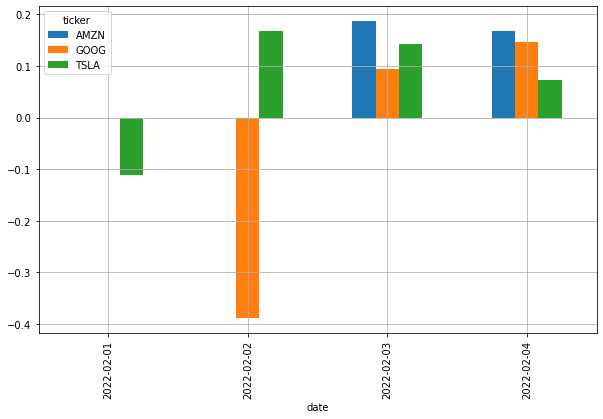

In [11]:
plt.rcParams['figure.figsize'] = [10, 6]

mean_scores = news_df.groupby(['ticker','date']).mean()

mean_scores = mean_scores.unstack()

mean_scores = mean_scores.xs('compound', axis="columns").transpose()

mean_scores.plot(kind = 'bar')

plt.grid()

plt.show()

In [ ]:
# https://nickmccullum.com/stock-market-sentiment-analysis-python/

## Notebooks
1. [The Machine Learning landscape](01_the_machine_learning_landscape.ipynb)
2. [End-to-end Machine Learning project](02_end_to_end_machine_learning_project.ipynb)
3. [Classification](03_classification.ipynb)
4. [Training Models](04_training_linear_models.ipynb)
5. [Support Vector Machines](05_support_vector_machines.ipynb)
6. [Decision Trees](06_decision_trees.ipynb)
7. [Ensemble Learning and Random Forests](07_ensemble_learning_and_random_forests.ipynb)
8. [Dimensionality Reduction](08_dimensionality_reduction.ipynb)
9. [Unsupervised Learning Techniques](09_unsupervised_learning.ipynb)
10. [Artificial Neural Nets with Keras](10_neural_nets_with_keras.ipynb)
11. [Training Deep Neural Networks](11_training_deep_neural_networks.ipynb)
12. [Custom Models and Training with TensorFlow](12_custom_models_and_training_with_tensorflow.ipynb)
13. [Loading and Preprocessing Data](13_loading_and_preprocessing_data.ipynb)
14. [Deep Computer Vision Using Convolutional Neural Networks](14_deep_computer_vision_with_cnns.ipynb)
15. [Processing Sequences Using RNNs and CNNs](15_processing_sequences_using_rnns_and_cnns.ipynb)
16. [Natural Language Processing with RNNs and Attention](16_nlp_with_rnns_and_attention.ipynb)
17. [Representation Learning and Generative Learning Using Autencoders and GANs](17_autoencoders_and_gans.ipynb)
18. [Reinforcement Learning](18_reinforcement_learning.ipynb)
19. [Training and Deploying TensorFlow Models at Scale](19_training_and_deploying_at_scale.ipynb)

## Scientific Python tutorials
* [NumPy](tools_numpy.ipynb)
* [Matplotlib](tools_matplotlib.ipynb)
* [Pandas](tools_pandas.ipynb)

## Math Tutorials
* [Linear Algebra](math_linear_algebra.ipynb)
* [Differential Calculus](math_differential_calculus.ipynb)

## Extra Material
* [Auto-differentiation](extra_autodiff.ipynb)

## Misc.
* [Equations](book_equations.pdf) (list of equations in the book)

## Prerequisites

### To understand
* **Python** – you don't need to be an expert python programmer, but you do need to know the basics. If you don't, the official [Python tutorial](https://docs.python.org/3/tutorial/) is a good place to start.
* **Scientific Python** – We will be using a few popular python libraries, in particular NumPy, matplotlib and pandas. If you are not familiar with these libraries, you should probably start by going through the tutorials in the Tools section (especially NumPy).
* **Math** – We will also use some notions of Linear Algebra, Calculus, Statistics and Probability theory. You should be able to follow along if you learned these in the past as it won't be very advanced, but if you don't know about these topics or you need a refresher then go through the appropriate introduction in the Math section.

### To run the examples
* **Jupyter** – These notebooks are based on Jupyter. You can run these notebooks in just one click using a hosted platform such as Binder, Deepnote or Colaboratory (no installation required), or you can just view them using Jupyter.org's viewer, or you can install everything on your machine, as you prefer. Check out the [home page](https://github.com/ageron/handson-ml2/) for more details.